In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
tr=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
ts=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
tr.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
tr.isnull().sum().sort_values(ascending=False).head(30)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
BldgType           0
Neighborhood       0
LandSlope          0
LotConfig          0
Condition1         0
LandContour        0
LotShape           0
Street             0
LotArea            0
MSSubClass         0
dtype: int64

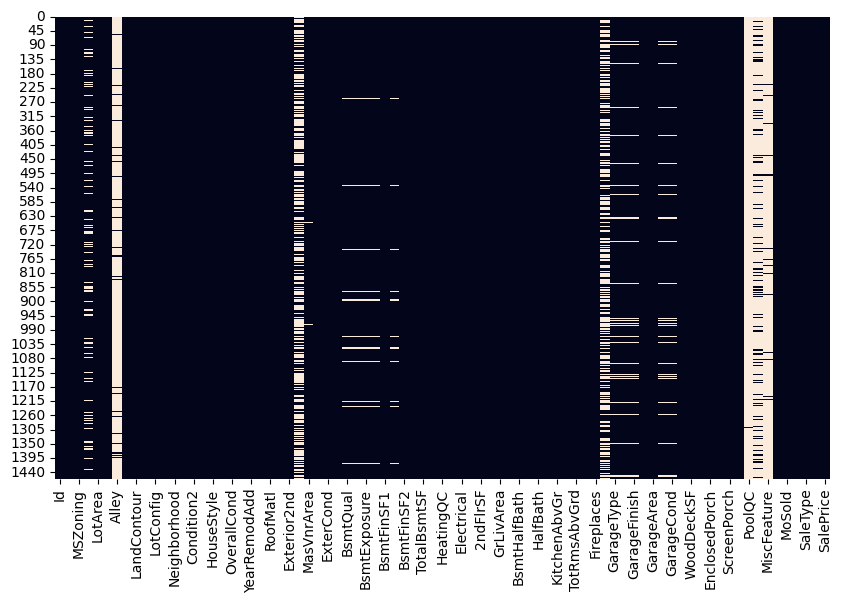

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(tr.isnull(), cbar=False)
plt.show()


In [5]:
tr.drop(["Alley", "PoolQC", "MiscFeature","Fence","MasVnrType"], axis=1, inplace=True)
ts.drop(["Alley", "PoolQC", "MiscFeature","Fence","MasVnrType"], axis=1, inplace=True)


In [6]:
num_cols = tr.select_dtypes(include="number").columns
cat_cols = tr.select_dtypes(exclude="number").columns

tr[num_cols] = tr[num_cols].fillna(tr[num_cols].mean())
tr[cat_cols] = tr[cat_cols].fillna(tr[cat_cols].mode().iloc[0])

num_cols = ts.select_dtypes(include="number").columns
cat_cols = ts.select_dtypes(exclude="number").columns

ts[num_cols] = ts[num_cols].fillna(ts[num_cols].mean())
ts[cat_cols] = ts[cat_cols].fillna(ts[cat_cols].mode().iloc[0])


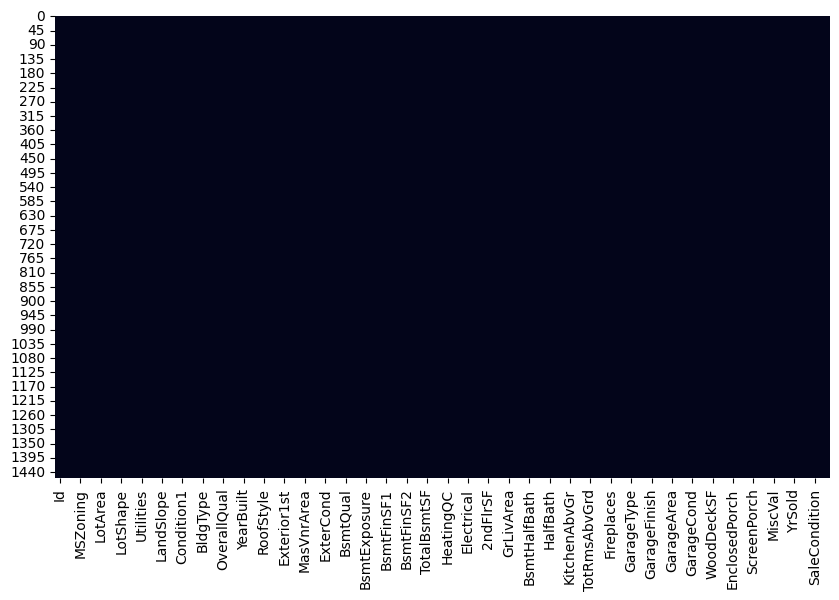

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(tr.isnull(), cbar=False)
plt.show()


In [8]:
from xgboost import XGBRegressor

y=tr["SalePrice"]

f = [
    "MSSubClass","MSZoning","LotFrontage","LotArea","Street","LotShape",
    "LandContour","Utilities","LotConfig","LandSlope","Neighborhood",
    "Condition1","Condition2","BldgType","HouseStyle","OverallQual",
    "OverallCond","YearBuilt","YearRemodAdd","RoofStyle","RoofMatl",
    "Exterior1st","Exterior2nd","MasVnrArea","ExterQual","ExterCond",
    "Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
    "BsmtFinSF1","BsmtFinType2","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
    "Heating","HeatingQC","CentralAir","Electrical","1stFlrSF","2ndFlrSF",
    "LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath",
    "HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd",
    "Functional","Fireplaces","FireplaceQu","GarageType","GarageYrBlt",
    "GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond",
    "PavedDrive","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch",
    "ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SaleType",
    "SaleCondition"
]

X=pd.get_dummies(tr[f])
Xt=pd.get_dummies(ts[f])
X, Xt = X.align(Xt, join="left", axis=1, fill_value=0)

model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X, y)
predictions = model.predict(Xt)

submission = pd.DataFrame({
    "Id":ts.Id,      
    "SalePrice": predictions   })
submission.to_csv("submission.csv", index=False)
print("Your submission was successfully saved!")

ou=pd.read_csv("/kaggle/working/submission.csv")
ou.head()

Your submission was successfully saved!


,Id,SalePrice
0,1461,127398.87
1,1462,155389.88
2,1463,183273.33
3,1464,185143.84
4,1465,201850.16
